<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023_DS/blob/main/Python/Python_DS/DS_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn

## Seabornとは


**Seaborn**もmatplotlibと同じように、データの可視化をするライブラリです。  
中でmatplotlibを使っていますが、よりきれいに表示することができます。より実践的です。

![リンクテキスト](https://imgur.com/IwusMXK.png)

これまでに比べると量が少ないと思います。

GoogleColabやJupyter Labといった環境下では、最初から入っているため改めて入れる必要はありません。  
自分で入れる場合は`conda install seaborn`や`pip install seaborn`という記述をします。

Seabornをimportする際、`sns`とするのが一般的です。

In [ ]:
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib

## ヒストグラム
matplotlibでも学習したヒストグラムです。最頻出です。


In [2]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


### sns.histplot()


ヒストグラムを作るには**`sns.histplot()`**関数を使います。  

今回は、`pclass`カラムのデータをヒストグラム化します。

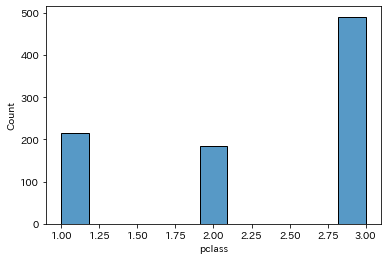

In [3]:
sns.histplot(df, x="pclass")

引数`element`を**step**と指定すると、棒グラフの境が消えます。

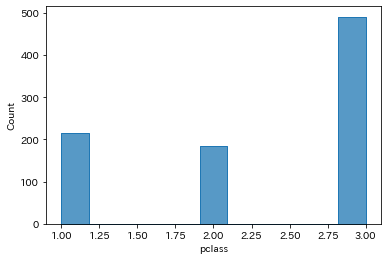

In [4]:
sns.histplot(df, x="pclass", element='step')

引数`hue`に「**分割したい列名**」を指定すると、  
項目ごとにグラフ化することができます。

年齢別の生存者の割合について確認しましょう。

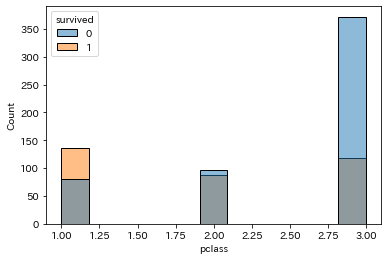

In [5]:
sns.histplot(df, x="pclass", hue='survived')

引数`multiple`を**stack**と指定することで、「積み上げグラフ」を作成できます。

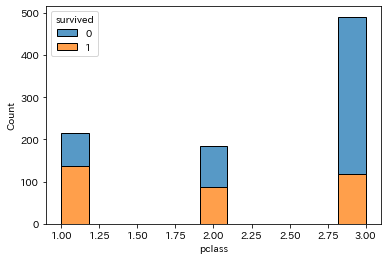

In [6]:
sns.histplot(df, x="pclass", hue='survived', multiple='stack')

引数`multiple`を**fill**と指定することで、「100%積み上げグラフ」を作成できます。

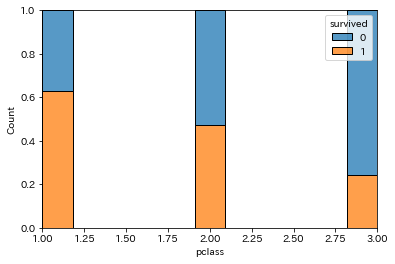

In [7]:
sns.histplot(df, x="pclass", hue='survived', multiple='fill')

客室等級が低いほど志望者の割合が多くなることが分かります。

### sns.displot()
2変量のヒストグラムを取得したい場合は、**`sns.displot()`**関数を使います。  
今回は`age`カラムと`fare`カラムのデータを作成します。

In [8]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [9]:
df = df.dropna(subset=["age"])  # 今回は欠損値の行をdrop

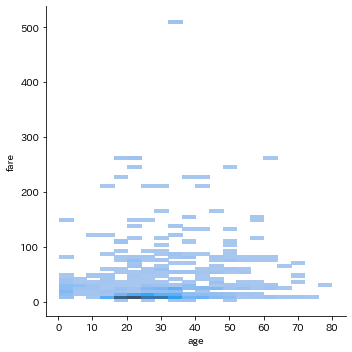

In [10]:
sns.displot(df, x="age", y="fare", alpha=1)

引数`hue`に「分割したい列名」を指定すると、  
項目ごとにグラフ化することができます。

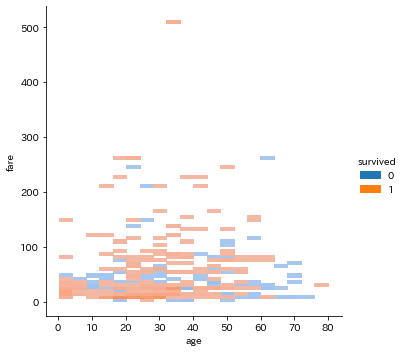

In [11]:
sns.displot(df, x="age" , y="fare", alpha=1, hue='survived')

高いチケットを持っている客は比較的生き残ったこと、  
高齢の客は比較的亡くなった方が多いこと、などが分かります。

### sns.jointplot()


2変数の分布を見ることができます。  
散布図とヒストグラムの両方を可視化できるのが特徴です。

In [12]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


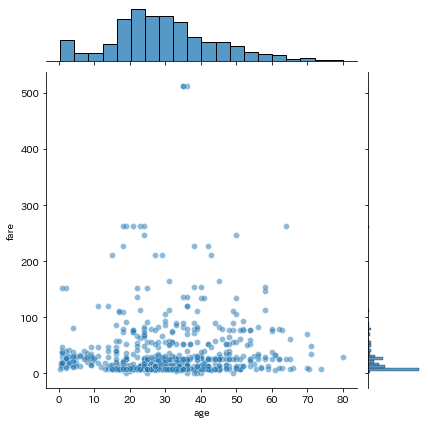

In [13]:
sns.jointplot(data=df, x="age",  y="fare", alpha=0.5)

引数`hue`に「分割したい列名」を指定すると、  
項目ごとにグラフ化することができます。

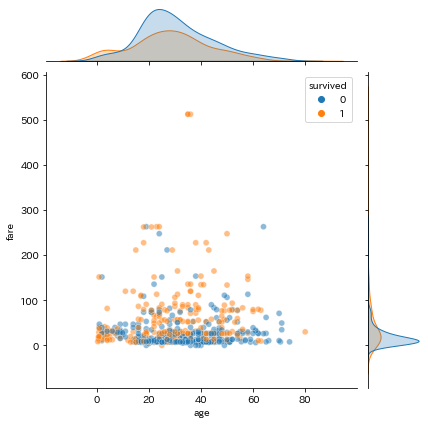

In [14]:
sns.jointplot(data=df, x="age",  y="fare", alpha=0.5, hue='survived')

引数**`kind`**で**`reg`**と指定すると、2変数の大まかな関係を線で引くことができます。  
（カーネル密度推定）

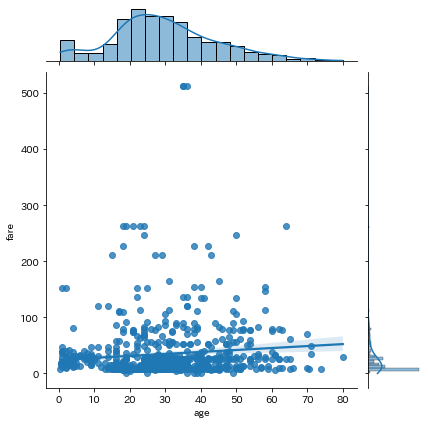

In [15]:
sns.jointplot(data=df, x="age",  y="fare",  kind='reg')

引数`kind`を**`hex`**と指定すると、散布図を六角形のヒートマップ形式で表示します。

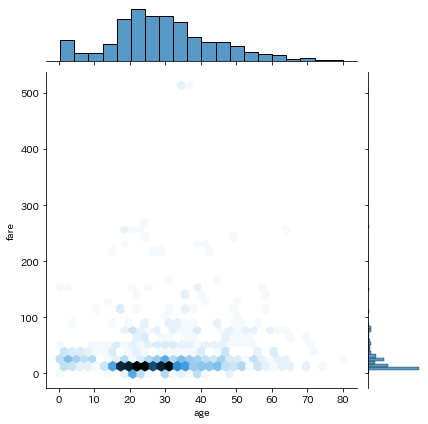

In [16]:
sns.jointplot(data=df, x="age",  y="fare", kind='hex')

データの重なり具合がより分かりやすくなったと思います。

### sns.pairplot()



Seabornの中で再頻出の関数です。  
DataFrame内にある全ての数値項目のペアのplotを表示できます。

In [17]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


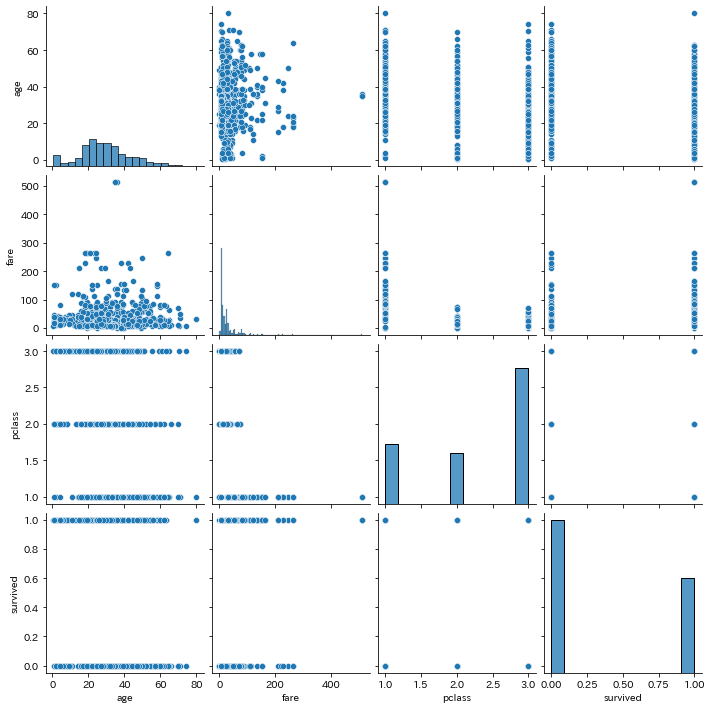

In [18]:
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']])  # 不要なカラムは除く

同じカラムが交差するところは、そのカラムのヒストグラムが表示されます。

`pairplot`では引数**`hue`**を使ってデータの色分けをすることが多いです。  
カテゴリごとにマーカーの色を変えることができます。

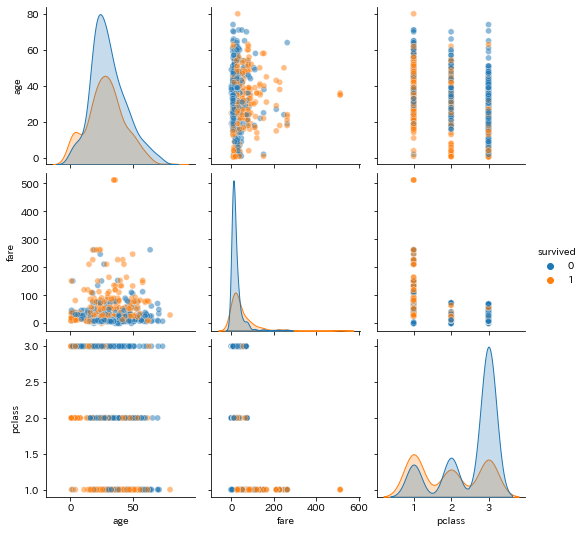

In [19]:
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue='survived', plot_kws={'alpha':0.5})

## Categorical Plot
カテゴリーの値が入ったカラムに対してのplotを**Categorical Plot**といいます。  
いくつか用意されています。

### sns.countplot()


データの数を単純にカテゴリ別に比べます。

`sibsp`（兄弟・配偶者）カラムと`parch`（親・子）カラムを足して  
`partner`カラムを作っていきます。

In [20]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [21]:
df["partner"] = df["sibsp"] + df["parch"]

人数によって生存者がどうなっているのかを確認してみましょう。


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


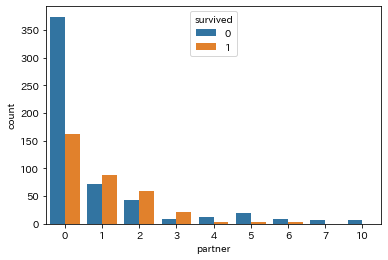

In [22]:
sns.countplot('partner', data=df, hue='survived')

家族連れの人の方が生存者の割合が高いことが分かります。

家族の人数ごとではなく、家族がいたかどうかで  
割合の違いを見てみましょう。

In [23]:
mapping = {True:"alone", False:"with family"}
df["alone"] = df["alone"].map(mapping)
df["alone"]

0      with family
1      with family
2            alone
3      with family
4            alone
          ...     
886          alone
887          alone
888    with family
889          alone
890          alone
Name: alone, Length: 891, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


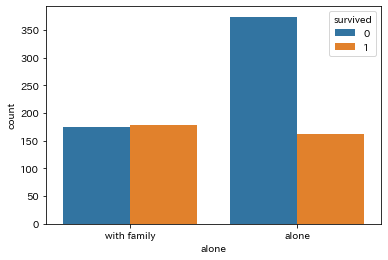

In [24]:
sns.countplot('alone', data=df, hue='survived')

具体的な割合を見てみましょう。

In [25]:
df.groupby("alone").mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,partner
alone,,,,,,,,
alone,0.303538,2.400372,32.220297,0.000000,0.000000,21.242689,0.763501,0.000000
with family,0.505650,2.169492,26.413452,1.316384,0.960452,48.832275,0.358757,2.276836


生存率は一人の方が約30%、家族連れの方が約50%であることが分かります。

### sns.barplot()
カテゴリーごとに分けて、指定したカラムの平均値を比較する棒グラフを作ることができます。

In [26]:
df = sns.load_dataset('titanic')
df["partner"] = df["sibsp"] + df["parch"]
df["survived"] *= 100  # %表示

家族の数ごとの生存率を確認するグラフを書いてみましょう。

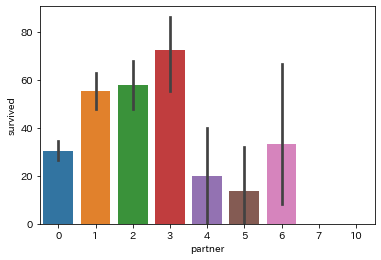

In [27]:
sns.barplot(x='partner', y='survived', data=df)

黒い線は**エラーバー**と呼ばれるもので、不確かさを示すものです。  
[こちら](https://3pysci.com/python-matplotlib-6/)ではエラーバーについていろいろな話があります。

平均値以外の値を比較したい場合は、引数**`estimator`**を使います。  
Numpyの関数で指定します。

＜例＞ チケットクラスごとの年齢の平均値と中央値を表示する

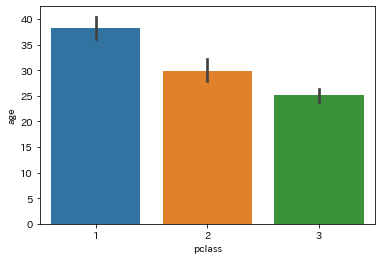

In [28]:
# 平均値の比較
sns.barplot(x='pclass', y='age', data=df)

In [29]:
df.groupby("pclass").mean()["age"]

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

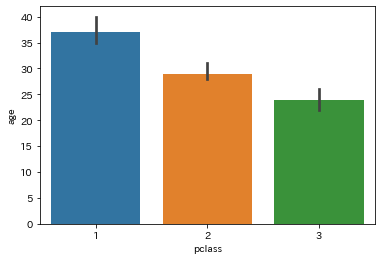

In [30]:
# 中央値の比較
sns.barplot(x='pclass', y='age', data=df, estimator=np.median)

In [31]:
df.groupby("pclass").median()["age"]

pclass
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64

### sns.boxplot()
matplotlibでも学習した箱ひげ図と同じですが、  
Seabornの方が使い勝手の良さと綺麗さからよく好まれるようです。

In [32]:
df = sns.load_dataset('titanic')

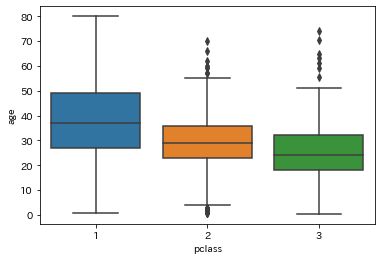

In [33]:
sns.boxplot(x="pclass" , y="age", data=df)

引数`hue`に「分割したい列名」を指定すると、  
さらに分割することができます。

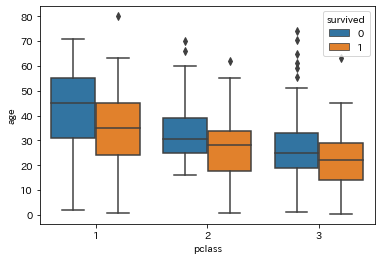

In [34]:
sns.boxplot(x="pclass" , y="age", data=df, hue="survived")

### sns.violinplot()


データの分布に応じて箱の形を変えることができます。  

平均にデータが集まることが多いために、バイオリンのような形になります。

In [35]:
df = sns.load_dataset('titanic')

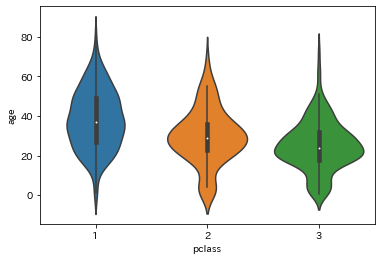

In [36]:
sns.violinplot(x='pclass', y='age', data=df)

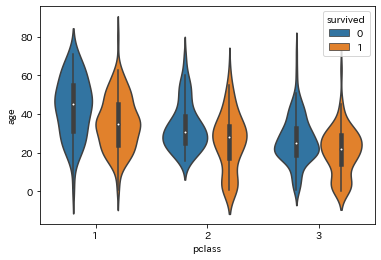

In [37]:
sns.violinplot(x='pclass', y='age', data=df, hue="survived")

統計量の比較だけを把握したい場合は`boxplot`を、  
全体の分布の様子を把握したい場合は`violinplot`を使うようにしましょう。

引数`split`をTrueに、引数`inner`を**quart**にすることで、見やすいグラフが完成します。

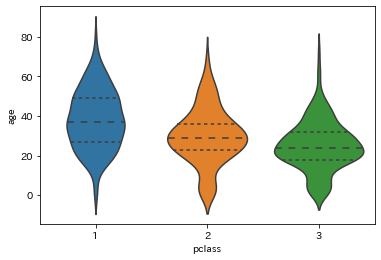

In [38]:
sns.violinplot(x='pclass', y='age', data=df, split=True , inner="quart")

### sns.swarmplot()


violinplotでは表示しているのは密度であるため、実際の乗客数を比較することができません。  

そこで使うのが**swarmplot**です。実際の分布をみることができます。

In [39]:
df = sns.load_dataset('titanic')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


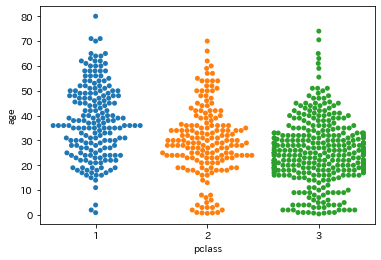

In [40]:
sns.swarmplot(x='pclass', y='age', data=df)

1stクラスは他のクラスに比べて年配の方が多そうです。

プロットが潰れているところがあるので、   
プロットの全体のサイズを変えましょう。

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


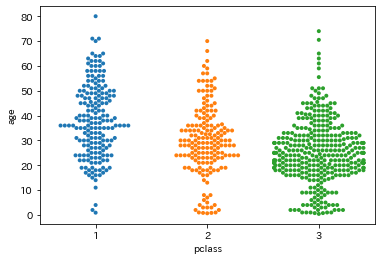

In [41]:
sns.swarmplot(x='pclass', y='age', data=df, size=4)

引数`hue`を指定することもできます。

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


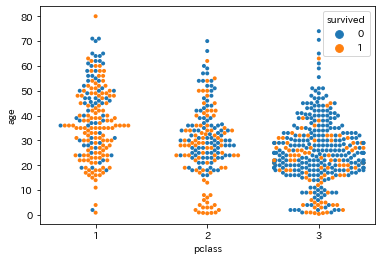

In [42]:
sns.swarmplot(x='pclass', y='age', data=df, size=4, hue='survived')

3rdクラスの方（等級が低い方）の死亡者の割合の高さが分かります。

swarmplotでは統計量は出てきません。  
boxplotやviolinplotと、特性を考えながら合わせて使うようにしましょう。

## ヒートマップ


表の各値の大きさに応じて色付けした図を**ヒートマップ**といいます。  
一目で値の大きさが分かります。また、データの傾向を見ることができます。

ヒートマップは、**データサイエンスでは大変よく使われる図**です。  
　・相関表：各カラム間の相関を示すもの（[こちら](https://datawokagaku.com/correlation_coefficient/)が参考になります）  
　・混同行列：分類器の分類を表にしたもの（[こちら](https://bit.ly/3YKkuim)が参考になります）



今回は実際に相関表を作り、ヒートマップを見ていきましょう。

In [43]:
df = sns.load_dataset('titanic')
df.corr()  # 相関表の作成

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


あとは**`sns.heatmap()`**の中にこの相関表を入れるだけです。

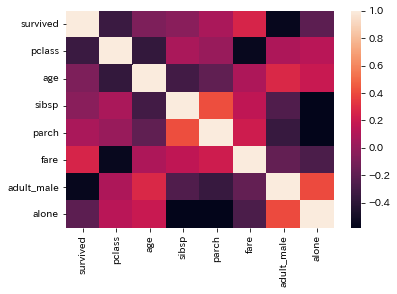

In [44]:
sns.heatmap(df.corr())

引数**`annot`**をTrueに指定すると、各マスに数値を入れてくれます。原則つけるようにしましょう。  

また、引数**`cmap`**にカラーマップを指定すると色のグラデ―ジョンを指定できます。  
  `coolwarm`や`hot`、`plasma`などが有名です。

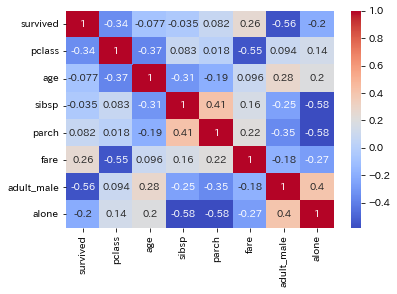

In [45]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## Seabornの装飾と付属情報



matplotlibでも同じような話がありました。  

Seabornはそもそもデフォルトできれいなグラフが描けるので、  
仕様頻度はそこまで高くないかもしれません。

### sns.set()
**`sns.set()`**のパラメータを加えることで、グラフを装飾できます。

#### context
引数`context`は**`paper`**、**`notebook`**、**`talk`**、**`poster`**の4つの値を取ります。

In [46]:
df = sns.load_dataset('titanic')
df = df.dropna(subset=['age'])  # 欠損値のあるレコードはdrop

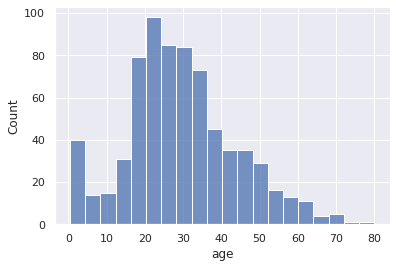

In [47]:
sns.set(context="notebook")
# sns.set_context("notebook")  でも同意
sns.histplot(df["age"])

プレゼンなどを想定し、文字を大きくしたい場合は`poster`を使うことが多いです。  
そうでない場合はデフォルトである`notebook`で問題ないようです。

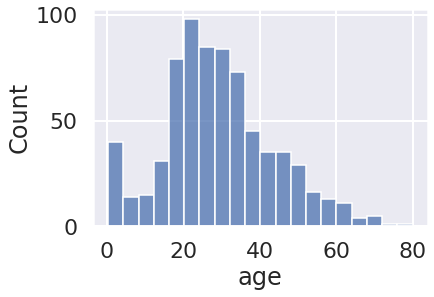

In [48]:
sns.set(context="poster")
# sns.set_context("poster")  でも同意
sns.histplot(df["age"])

#### style
引数`style`は**`darkgrid`**、**`whitegrid`**、**`dark`**、**`white`**、**`ticks`**の5つの値を取ります。

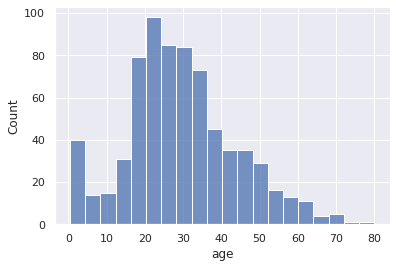

In [49]:
sns.set(context="notebook" , style="darkgrid")
sns.histplot(df["age"])

デフォルトは`darkgrid`ですが、好みのものを使うようにしましょう。

`ticks`を指定した場合はplotに軸と枠ができますが、  
**`sns.despine()`**を使うと軸を消すことができます。

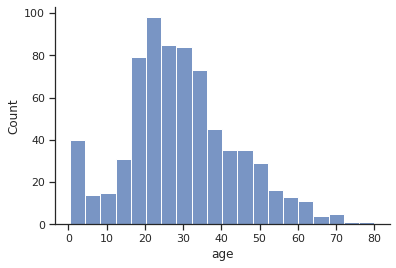

In [50]:
sns.set(context="notebook" , style="ticks")
sns.histplot(df["age"])
sns.despine()

引数には**`top`**、**`right`**、**`left`**、**`bottom`**をbool型の値で指定できます。  

指定するとそれぞれを表示を切り替えることができます。  
デフォルトは`top`、`right`がTrueになっています。

#### palette
色のパレットを指定することができます。  
先ほど引数`cmap`に指定していたものになります。

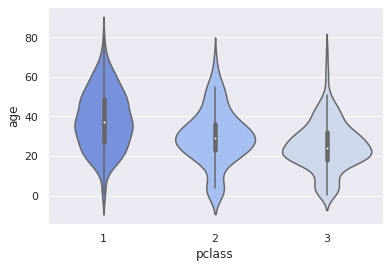

In [51]:
sns.set(palette='coolwarm')
sns.violinplot(x='pclass', y='age', data=df)

`sns.set()`内で指定した`palette`は、**hueの色にしか適用されません**。少し見にくいと思います。  

violinplot自体の色を変えたいときは、violinplot内で引数`palette`を指定しましょう。

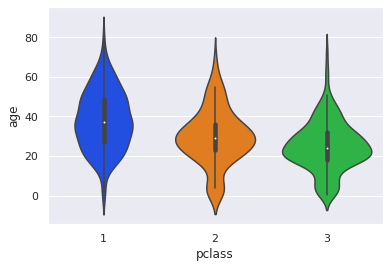

In [52]:
sns.set(palette='coolwarm')
sns.violinplot(x='pclass', y='age', data=df, palette="bright")
# 興味のある方は「hsv」,「twilight」などに変更してみてください

### 付属情報


**Seabornは中でmatplotlibを含んでいる**ので、  
同じようにタイトルや軸の名前を指定することができます。  

同様にして、**`plt.savefig()`**で保存も可能です。

In [53]:
df = sns.load_dataset('titanic')

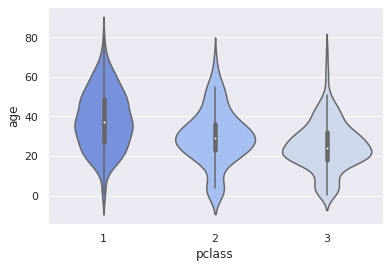

In [54]:
sns.set(palette='coolwarm')
sns.violinplot(x='pclass', y='age', data=df)

In [55]:
plt.savefig("seaborn_sample.png")

<Figure size 432x288 with 0 Axes>